<a href="https://colab.research.google.com/github/GoncaloCJG/Turtle_Classifier/blob/main/Turtle_ModelClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install git+https://github.com/fastai/fastai2
import fastai2
import os

  Cloning https://github.com/fastai/fastai2 to /tmp/pip-req-build-azj7dllc
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-azj7dllc
  Running command git submodule update --init --recursive -q


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

# Checking the images from the corresponding folders

After looking in each folder, I did some data cleaning and end up using 150 images for each turtle species.

In [ ]:
path = Path('/content/gdrive/MyDrive/turtles')

In [ ]:
import os
len(os.listdir("/content/gdrive/MyDrive/turtles/Aldabra_Tortoise"))

150

In [ ]:
len(os.listdir("/content/gdrive/MyDrive/turtles/Hawksbill_Turtle"))

150

In [ ]:
len(os.listdir("/content/gdrive/MyDrive/turtles/Red_Eared_Slider"))

150

# Data Processing

In [ ]:
turtles = DataBlock(
           get_items=get_image_files,
           get_y=parent_label,
           blocks=(ImageBlock, CategoryBlock), 
           item_tfms=RandomResizedCrop(224, min_scale=0.3),
           splitter=RandomSplitter(valid_pct=0.2, seed=100),
           batch_tfms=aug_transforms(mult=2)
        )

In [ ]:
dls = turtles.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


## Training the model

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.005156,0.182541,0.033333,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.229681,0.163604,0.033333,00:18
1,0.156710,0.121286,0.011111,00:17
2,0.160935,0.146684,0.022222,00:18
3,0.142045,0.123716,0.011111,00:17


# Analysis of the training results



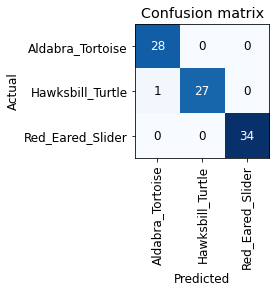

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

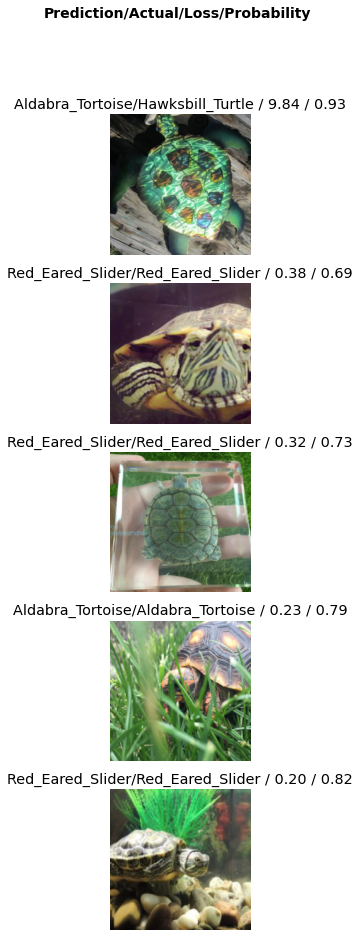

In [ ]:
interp.plot_top_losses(5, nrows=5)

# Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]